<h1>The original Support Vector Machine</h1>
<p>Visualize how the SVM find the best decision boundary for the data </p>

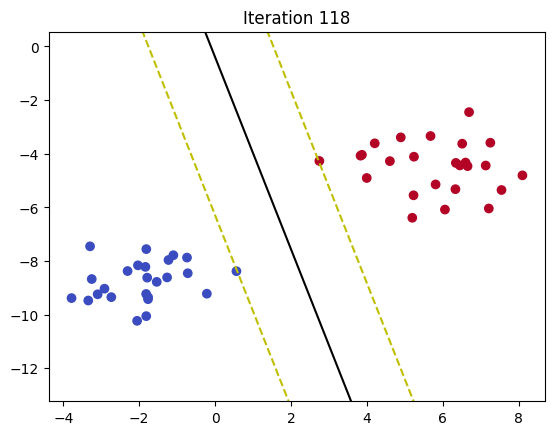

Converged at iteration 119
Weights: [0.60694301 0.16940065]
Bias: -0.06800000000000005


In [ ]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from IPython.display import clear_output

class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=120, tol=1e-3):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.tol = tol
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)
        self.w = np.zeros(n_features)
        self.b = 0

        prev_w = np.copy(self.w)
        prev_b = np.copy(self.b)

        for iter in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

            if np.linalg.norm(self.w - prev_w) < self.tol and np.abs(self.b - prev_b) < self.tol:
                print(f"Converged at iteration {iter}")
                break

            prev_w = np.copy(self.w)
            prev_b = np.copy(self.b)

            self.visualize_svm(X, y, iter)

    def visualize_svm(self, X, y, iter):
        def get_hyperplane_value(x, w, b, offset):
            return (-w[0] * x + b + offset) / w[1]

        plt.clf()
        plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, cmap='coolwarm')

        x0_min, x0_max = np.amin(X[:, 0]), np.amax(X[:, 0])
        x1_min, x1_max = np.amin(X[:, 1]), np.amax(X[:, 1])
        plt.ylim([x1_min - 3, x1_max + 3])

        x1_min_val = get_hyperplane_value(x0_min, self.w, self.b, 0)
        x1_max_val = get_hyperplane_value(x0_max, self.w, self.b, 0)
        plt.plot([x0_min, x0_max], [x1_min_val, x1_max_val], "k")

        x1_min_val_m = get_hyperplane_value(x0_min, self.w, self.b, -1)
        x1_max_val_m = get_hyperplane_value(x0_max, self.w, self.b, -1)
        plt.plot([x0_min, x0_max], [x1_min_val_m, x1_max_val_m], "y--")

        x1_min_val_p = get_hyperplane_value(x0_min, self.w, self.b, 1)
        x1_max_val_p = get_hyperplane_value(x0_max, self.w, self.b, 1)
        plt.plot([x0_min, x0_max], [x1_min_val_p, x1_max_val_p], "y--")

        plt.title(f'Iteration {iter}')

        clear_output(wait=True)
        plt.show()

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

if __name__ == "__main__":
    X, y = datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40)
    y = np.where(y == 0, -1, 1)

    clf = SVM(n_iters=120, learning_rate=0.001, lambda_param=0.01)
    clf.fit(X, y)
    print("Weights:", clf.w)
    print("Bias:", clf.b)


<h1>Scaling problem in SVM</h1>
<h3>Assume having data look like</h3>

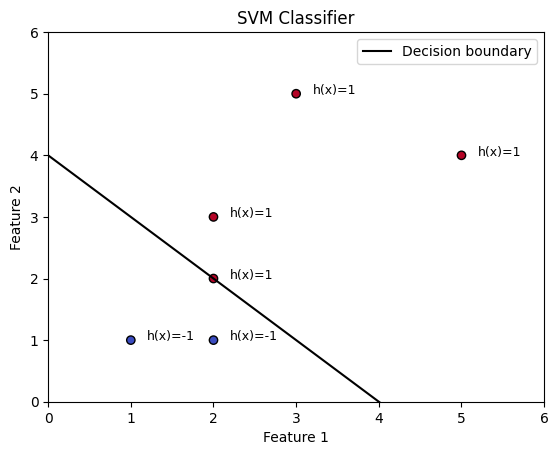

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def classifier(w, b, x):
    z = np.dot(w, x) + b
    return 1 if z >= 0 else -1

X = np.array([
    [2, 3],
    [1, 1],
    [2, 2],
    [3, 5],
    [2, 1],
    [5, 4],
])
y = np.array([1, -1, 1, 1, -1, 1])


w = np.array([1, 1])
b = -4

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')

x1_vals = np.linspace(0, 6, 100)
x2_vals = -(w[0] * x1_vals + b) / w[1]
ax.plot(x1_vals, x2_vals, 'k-', label="Decision boundary")

for i, point in enumerate(X):
    pred = classifier(w, b, point)
    ax.text(point[0] + 0.2, point[1], f"h(x)={pred}", fontsize=9, color='black')

ax.set_xlim(0, 6)
ax.set_ylim(0, 6)
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.legend()
plt.title("SVM Classifier")
plt.show()


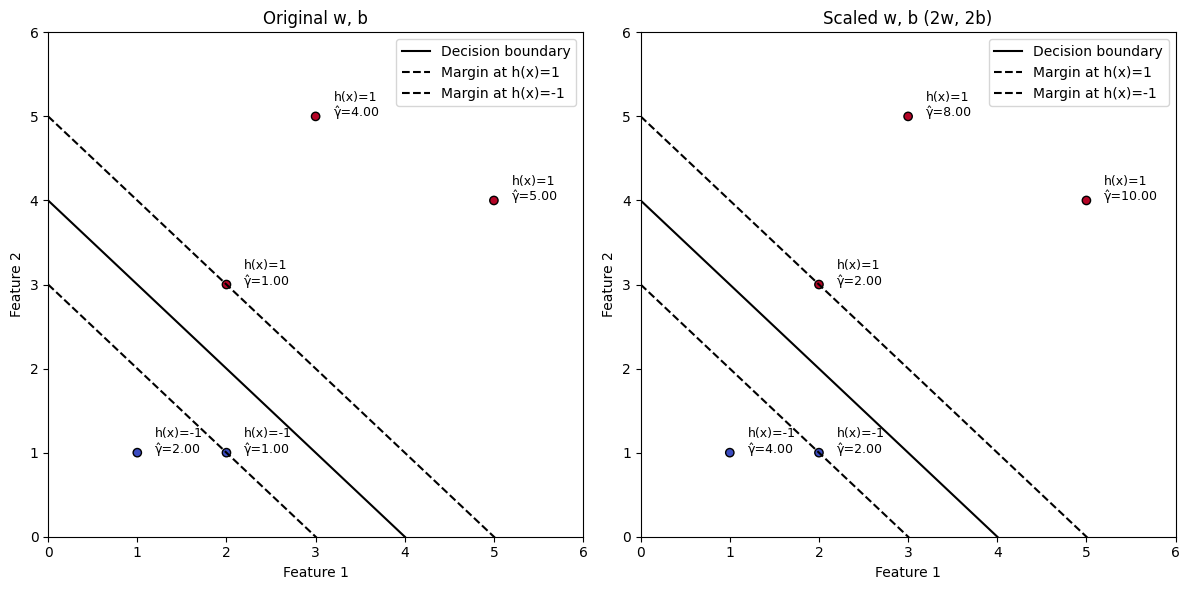

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def classifier(w, b, x):
    z = np.dot(w, x) + b
    return 1 if z >= 0 else -1

def functional_margin(w, b, x, y):
    return abs(y * (np.dot(w, x) + b))

X = np.array([
    [2, 3],
    [1, 1],
    [3, 5],
    [2, 1],
    [5, 4],
])
y = np.array([1, -1, 1, -1, 1])

w = np.array([1, 1])
b = -4

def margin_line(w, b, margin_value):
    return -(w[0] * x1_vals + b - margin_value) / w[1]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')

x1_vals = np.linspace(0, 6, 100)
x2_vals = -(w[0] * x1_vals + b) / w[1]
ax[0].plot(x1_vals, x2_vals, 'k-', label="Decision boundary")

x2_vals_margin1 = margin_line(w, b, 1)
x2_vals_margin2 = margin_line(w, b, -1)
ax[0].plot(x1_vals, x2_vals_margin1, 'k--', label="Margin at h(x)=1")
ax[0].plot(x1_vals, x2_vals_margin2, 'k--', label="Margin at h(x)=-1")

for i, point in enumerate(X):
    pred = classifier(w, b, point)
    margin = functional_margin(w, b, point, y[i])
    ax[0].text(point[0] + 0.2, point[1], f"h(x)={pred}\nγ̂={margin:.2f}", fontsize=9, color='black')

ax[0].set_xlim(0, 6)
ax[0].set_ylim(0, 6)
ax[0].set_xlabel("Feature 1")
ax[0].set_ylabel("Feature 2")
ax[0].legend()
ax[0].set_title("Original w, b")

w_new = 2 * w
b_new = 2 * b

ax[1].scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')

x2_vals_new = -(w_new[0] * x1_vals + b_new) / w_new[1]
ax[1].plot(x1_vals, x2_vals_new, 'k-', label="Decision boundary")

x2_vals_margin1_new = margin_line(w, b, 1)
x2_vals_margin2_new = margin_line(w, b, -1)
ax[1].plot(x1_vals, x2_vals_margin1_new, 'k--', label="Margin at h(x)=1")
ax[1].plot(x1_vals, x2_vals_margin2_new, 'k--', label="Margin at h(x)=-1")

for i, point in enumerate(X):
    pred = classifier(w_new, b_new, point)
    margin_new = functional_margin(w_new, b_new, point, y[i])
    ax[1].text(point[0] + 0.2, point[1], f"h(x)={pred}\nγ̂={margin_new:.2f}", fontsize=9, color='black')

ax[1].set_xlim(0, 6)
ax[1].set_ylim(0, 6)
ax[1].set_xlabel("Feature 1")
ax[1].set_ylabel("Feature 2")
ax[1].legend()
ax[1].set_title("Scaled w, b (2w, 2b)")

plt.tight_layout()
plt.show()


<h3>Before and after scaling, the decision boundary looks similar, but the predicted value y hat is double compared to the original.</h3>

- As we can see, at h(x) = -1, before scaling y hat get a value of 2.00, but after scaling, with the same h(x) = -1, the y hat get a value of 4.00.
- This doubling of the predicted value indicates that scaling affects the magnitude of the output, even though the separation between classes (decision boundary) visually appears unchanged.
- From that, scaling does not inherently help or hinder class separation. It ensures numerical stability and proper functioning of the kernel but does not resolve issues like data overlap or misclassification.

# Ways to Deal with Scaling Problem in SVM

To solve the scaling issue, normalize $$\mathbf{w} $$ such that $$\|\mathbf{w}\|_2 = 1$$

$$ \left( \frac{\mathbf{w}}{\|\mathbf{w}\|_2}, \frac{b}{\|\mathbf{w}\|_2} \right) $$


This ensures the margin reflects true class separation.


<h1>Geometric Margin</h1>
The geometric margin for a training example $x^{(i)}$, $y^{(i)}$ is the
perpendicular distance from $x^{(i)}$ to the decision boundary:
$$\gamma^{(i)} = y^{(i)} \left( \frac{\mathbf{w}^T \mathbf{x}^{(i)} + b}{\|\mathbf{w}\|} \right)$$




- The geometric margin reflects the true separation of classes.
- It is invariant to rescaling of $\mathbf{w}$ and $\mathbf{b}$.

Point: [-5 -2], w.x + b: -8, y(i): 1, gamma: 5.65685424949238
Point: [0 4], w.x + b: 3, y(i): -1, gamma: 2.1213203435596424
Point: [4 0], w.x + b: 3, y(i): -1, gamma: 2.1213203435596424
Point: [-7  2], w.x + b: -6, y(i): 1, gamma: 4.242640687119285
Point: [ 0 -4], w.x + b: -5, y(i): 1, gamma: 3.5355339059327373


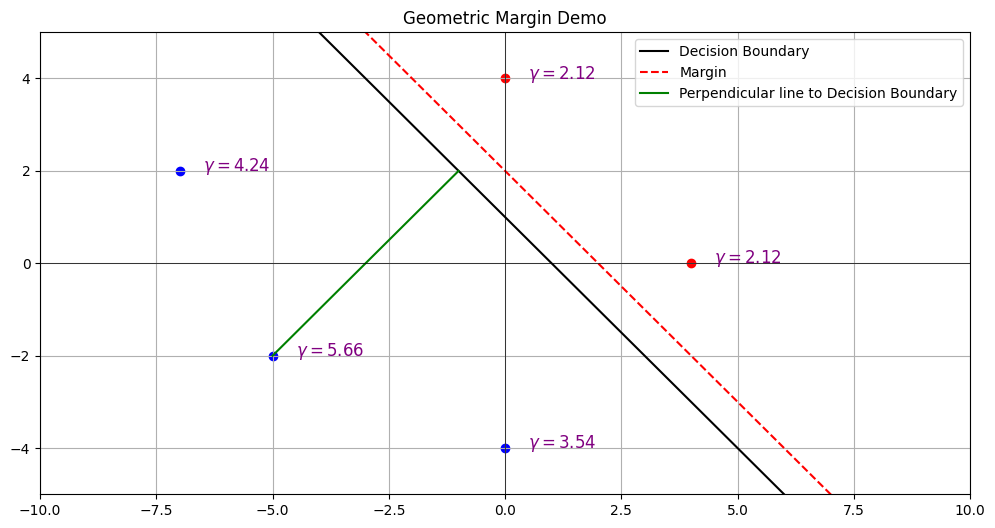

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

w = np.array([1, 1])
b = -1

points = [
    (np.array([-5, -2]), 1),
    (np.array([0, 4]), -1),
    (np.array([4, 0]), -1),
    (np.array([-7, 2]), 1),
    (np.array([0, -4]), 1)
]

x_vals = np.linspace(-15, 15, 100)
y_vals = -(w[0] * x_vals + b) / w[1]

margin = -(w[0] * x_vals + b - 1) / w[1]

plt.figure(figsize=(12, 6))

plt.plot(x_vals, y_vals, label='Decision Boundary', color='black')
plt.plot(x_vals, margin, 'r--', label='Margin')

for point, label in points:
    decision_value = np.dot(w, point) + b
    gamma = np.abs(decision_value) / np.linalg.norm(w)

    print(f"Point: {point}, w.x + b: {decision_value}, y(i): {label}, gamma: {gamma}")

    plt.scatter(point[0], point[1], color='blue' if label == 1 else 'red')

    plt.text(point[0] + 0.5, point[1], r'$\gamma = {0:.2f}$'.format(gamma), fontsize=12, color='purple', ha='left')

    if np.array_equal(point, np.array([-5, -2])):
        perpendicular_point = point - (np.dot(w, point) + b) / np.linalg.norm(w)**2 * w
        plt.plot([point[0], perpendicular_point[0]], [point[1], perpendicular_point[1]], color='green', linestyle='-', label=f'Perpendicular line to Decision Boundary')

plt.xlim(-10, 10)
plt.ylim(-5, 5)

plt.gca().set_aspect('auto', adjustable='box')

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.title('Geometric Margin Demo')
plt.grid(True)

plt.show()


<h3>Features mapping with polynomial kernel</h3>

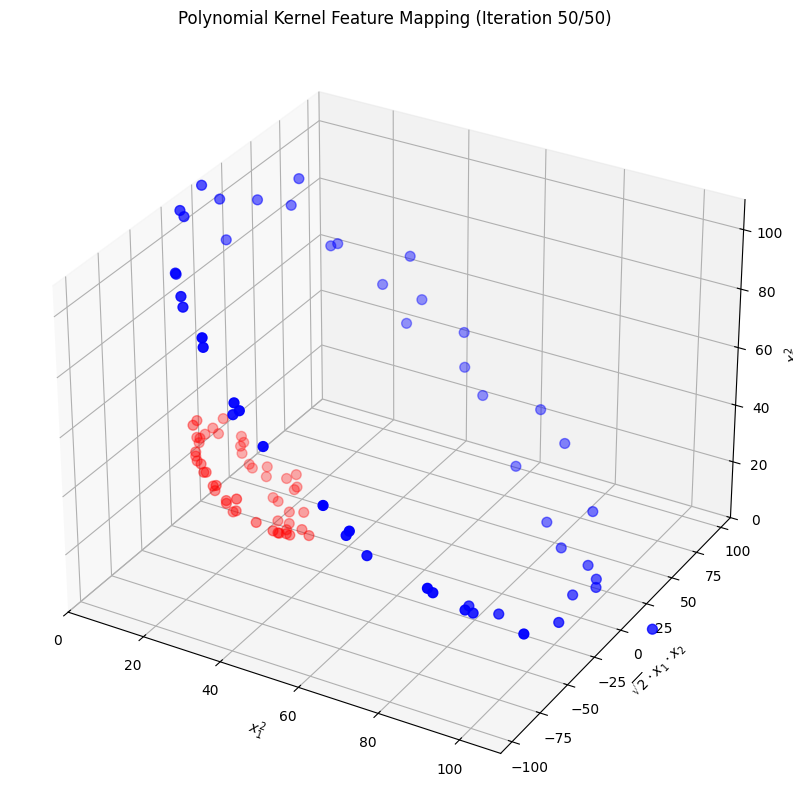

<Figure size 1800x1800 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output, display

def generate_circles(n_points, radius_inner, radius_outer):
    """
    Generate two concentric circles with specified radii and number of points.
    """
    angles = np.linspace(0, 2 * np.pi, n_points // 2, endpoint=False)
    inner_circle = np.c_[radius_inner * np.cos(angles), radius_inner * np.sin(angles)]
    outer_circle = np.c_[radius_outer * np.cos(angles), radius_outer * np.sin(angles)]

    inner_circle += np.random.normal(0, 0.4, inner_circle.shape)
    outer_circle += np.random.normal(0, 0.4, outer_circle.shape)

    X = np.vstack([inner_circle, outer_circle])
    y = np.array([0] * (n_points // 2) + [1] * (n_points // 2))
    return X, y

def poly_kernel_map(X, t):
    """
    Gradually maps 2D points to 3D space using polynomial kernel mapping.
    phi(x) = [x1^2, sqrt(2)*x1*x2, x2^2]
    t controls the animation step (0 <= t <= 1).
    """
    x1, x2 = X[:, 0], X[:, 1]
    z1 = t * (x1**2)
    z2 = t * (np.sqrt(2) * x1 * x2)
    z3 = t * (x2**2)
    return np.c_[z1, z2, z3]

n_points = 100
X, y = generate_circles(n_points, radius_inner=5, radius_outer=10)

n_iters = 50
scale_factor = 1.0

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([0, 110])
ax.set_ylim([-110, 110])
ax.set_zlim([0, 110])
ax.set_xlabel("x1^2")
ax.set_ylabel("sqrt(2) * x1 * x2")
ax.set_zlabel("x2^2")
ax.set_title("Polynomial Kernel Feature Mapping Animation")

for i in range(n_iters + 1):
    clear_output(wait=True)
    ax.clear()

    t = i / n_iters * scale_factor
    X_mapped = poly_kernel_map(X, t)

    colors = ['red' if label == 0 else 'blue' for label in y]
    ax.scatter(X_mapped[:, 0], X_mapped[:, 1], X_mapped[:, 2], c=colors, s=50)

    ax.set_xlim([0, 110])
    ax.set_ylim([-110, 110])
    ax.set_zlim([0, 110])
    ax.set_xlabel("$x_1^2$")
    ax.set_ylabel("$\sqrt{2} \cdot x_1 \cdot x_2$")
    ax.set_zlabel("$x_2^2$")
    ax.set_title(f"Polynomial Kernel Feature Mapping (Iteration {i}/{n_iters})")

    display(fig)
    plt.pause(0.1)

plt.figure(figsize= (18,18))
plt.close(fig)

<h1>Kernel Function in SVM</h1>
A Kernel function K(x, z) is defined as the inner product of feature
mappings:

$$K(x,z) = \phi(x)^T\phi(z)$$

- Avoids explicit computation of ϕ(x), saving time and memory.
- Simplifies the implementation of Kernel Trick in SVM models.
<br>
<h2>Type of kernels<h2>
- Linear kernel: For linear classification.
- Polynomial kernel: For polynomial decision boundaries.
- Gaussian (RBF) kernel: For highly non-linear decision boundaries



<h3>Linear Kernel<h3>
The linear kernel is the simplest kernel, defined as:

$$K(x,z) = x^Tz$$
- Visualize how linear kernel fit to the data step by step

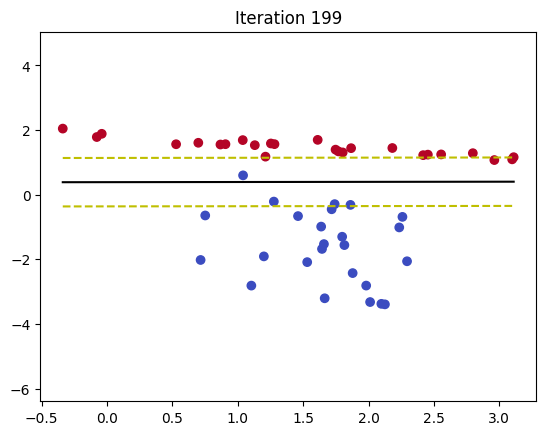

Weights: [-0.00624341  1.33386503]
Bias: 0.5170000000000003


In [ ]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from IPython.display import clear_output

class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=200, tol=1e-3):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.tol = tol
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)
        self.w = np.zeros(n_features)
        self.b = 0

        prev_w = np.copy(self.w)
        prev_b = np.copy(self.b)

        for iter in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

            if np.linalg.norm(self.w - prev_w) < self.tol and np.abs(self.b - prev_b) < self.tol:
                print(f"Converged at iteration {iter}")
                break

            prev_w = np.copy(self.w)
            prev_b = np.copy(self.b)

            self.visualize_svm(X, y, iter)

    def visualize_svm(self, X, y, iter):
        def get_hyperplane_value(x, w, b, offset):
            return (-w[0] * x + b + offset) / w[1]

        plt.clf()
        plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, cmap='coolwarm')

        x0_min, x0_max = np.amin(X[:, 0]), np.amax(X[:, 0])
        x1_min, x1_max = np.amin(X[:, 1]), np.amax(X[:, 1])
        plt.ylim([x1_min - 3, x1_max + 3])

        x1_min_val = get_hyperplane_value(x0_min, self.w, self.b, 0)
        x1_max_val = get_hyperplane_value(x0_max, self.w, self.b, 0)
        plt.plot([x0_min, x0_max], [x1_min_val, x1_max_val], "k")

        x1_min_val_m = get_hyperplane_value(x0_min, self.w, self.b, -1)
        x1_max_val_m = get_hyperplane_value(x0_max, self.w, self.b, -1)
        plt.plot([x0_min, x0_max], [x1_min_val_m, x1_max_val_m], "y--")

        x1_min_val_p = get_hyperplane_value(x0_min, self.w, self.b, 1)
        x1_max_val_p = get_hyperplane_value(x0_max, self.w, self.b, 1)
        plt.plot([x0_min, x0_max], [x1_min_val_p, x1_max_val_p], "y--")

        plt.title(f'Iteration {iter}')

        clear_output(wait=True)
        plt.show()

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

if __name__ == "__main__":
    X, y = datasets.make_classification(
    n_samples=50, n_features=2, n_informative=2, n_redundant=0,
    n_clusters_per_class=1, class_sep=1.5, random_state=42
    )
    y = np.where(y == 0, -1, 1)

    clf = SVM(n_iters=200, learning_rate=0.001, lambda_param=0.01)
    clf.fit(X, y)
    print("Weights:", clf.w)
    print("Bias:", clf.b)


- Visualize how gamma and C affect to the model with kernel is Linear

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from ipywidgets import interact, FloatSlider

# Create a classification dataset
X, y = make_classification(
    n_samples=50, n_features=2, n_informative=2, n_redundant=0,
    n_clusters_per_class=1, class_sep=1.5, random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def plot_svm(C, gamma):
    model = SVC(kernel='linear', C=C, gamma='auto')
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50, edgecolors='k')

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
               s=100, linewidth=1, facecolors='none', edgecolors='k')

    plt.title(f'SVM with Linear Kernel (C={C}, gamma={gamma}), Accuracy={acc:.2f}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

interact(plot_svm,
         C=FloatSlider(value=1.0, min=0.01, max=10.0, step=0.1, description='C'),
         gamma=FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='gamma'));

interactive(children=(FloatSlider(value=1.0, description='C', max=10.0, min=0.01), FloatSlider(value=1.0, desc…

<h3>The polynomial kernel is defined as: </h3>
$$K(x, z) = (x^Tz + c)^d$$
Where d is the degree of the polynomial, and $c ≥ 0$ controls the influence
of lower-degree terms.

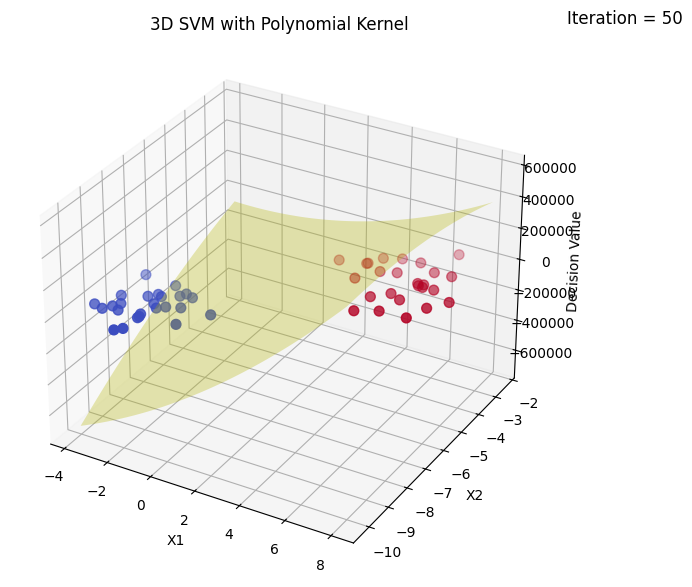

Weights (dual space): [ 5.48611068  3.94297367 -2.08471944  2.30155691 -3.31115586 -4.10178917
  2.19786975 -2.02561618  3.88518034 -2.76257401  6.48860592  2.7088374
 -3.34329725  3.70704447  4.92775968  6.9321443   4.91737216  4.23546324
  3.40244908  6.36514552 -3.83048752 -2.24938234 -3.03162249 -2.40383445
 -2.86417848 -4.62494015 -4.00057529 -1.02342189 -1.88057806 -2.95050272
  4.37195331  2.7213327  -2.58657128 -2.11332327  1.99874986 -4.45359398
  4.85396308 -3.89600027  2.02183866  4.68056574 -3.80107589 -3.38778954
  1.19026878  3.27422151  4.52166504 -3.12897645 -4.14346476  4.80499323
  5.17265887 -2.84850191], Bias: -0.001


In [ ]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output, display
from sklearn import svm, datasets

class SVMPolyKernel:
    def __init__(self, degree=2, coef0=1, learning_rate=0.001, lambda_param=0.01, n_iters=10):
        self.degree = degree
        self.coef0 = coef0
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None
        self.X_poly = None

    def polynomial_kernel(self, X, Z):
        X1 = np.atleast_2d(X)
        X2 = np.atleast_2d(Z)

        term1 = np.dot(X1, X2.T)**self.degree

        sqrt_term_X1 = np.sqrt(np.maximum(0, self.degree * self.coef0 * X1))
        sqrt_term_X2 = np.sqrt(np.maximum(0, self.degree * self.coef0 * X2))
        term2 = np.dot(sqrt_term_X1, sqrt_term_X2.T)
        term3 = self.coef0**self.degree
        return term1 + term2 + term3

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)

        self.X_poly = self.polynomial_kernel(X, X)
        self.w = np.zeros(n_samples)
        self.b = 0

        fig = plt.figure(figsize=(10, 7))
        ax = fig.add_subplot(111, projection='3d')
        iteration_text = fig.text(0.8, 0.9, '', fontsize=12)

        for iter in range(self.n_iters):
            for idx in range(n_samples):
                condition = y_[idx] * (np.dot(self.w, self.X_poly[idx]) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - y_[idx] * self.X_poly[idx])
                    self.b -= self.lr * y_[idx]

            clear_output(wait=True)
            self.visualize_svm(ax, X, y)
            iteration_text.set_text(f'Iteration = {iter + 1}')
            display(fig)

        plt.close(fig)

    def visualize_svm(self, ax, X, y):
        ax.clear()

        ax.scatter(X[:, 0], X[:, 1], y, c=y, cmap='coolwarm', s=50)

        x_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 50)
        y_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 50)
        X_grid, Y_grid = np.meshgrid(x_range, y_range)
        Z = self.predict_kernel(X_grid.ravel(), Y_grid.ravel(), X)

        Z = Z.reshape(X_grid.shape)

        ax.plot_surface(X_grid, Y_grid, Z, color='y', alpha=0.3, rstride=100, cstride=100)

        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Decision Value')
        ax.set_title("3D SVM with Polynomial Kernel")

    def predict_kernel(self, x1, x2, X_train):
        grid_points = np.c_[x1, x2]
        poly_values = self.polynomial_kernel(grid_points, X_train)
        decision_values = np.dot(poly_values, self.w) - self.b
        return decision_values

    def predict(self, X):
        X_poly = self.polynomial_kernel(X, X)
        approx = np.dot(X_poly, self.w) - self.b
        return np.sign(approx)

if __name__ == "__main__":
    y = np.where(y == 0, -1, 1)

    clf = SVMPolyKernel(degree=2, coef0=1, n_iters=50)
    clf.fit(X, y)
    print(f"Weights (dual space): {clf.w}, Bias: {clf.b}")


- Visualize how gamma and C affect to the model with kernel is polynomial

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from ipywidgets import interact, FloatSlider, IntSlider

X, y = datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def plot_svm_poly(C, degree):
    model = SVC(kernel='poly', C=C, degree=int(degree), gamma='auto')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50, edgecolors='k')

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
               s=100, linewidth=1, facecolors='none', edgecolors='k')

    plt.title(f'SVM with Polynomial Kernel (C={C}, degree={degree}), Accuracy={acc:.2f}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

interact(plot_svm_poly,
         C=FloatSlider(value=1.0, min=0.01, max=10.0, step=0.1, description='C'),
         degree=IntSlider(value=3, min=2, max=10, step=1, description='degree'));


interactive(children=(FloatSlider(value=1.0, description='C', max=10.0, min=0.01), IntSlider(value=3, descript…

<h3> The RBF kernel is define as:</h3>
$$K(\mathbf{x}, \mathbf{z}) = \exp\left(-\frac{\|\mathbf{x} - \mathbf{z}\|^2}{2\sigma^2}\right)$$


- Measures similarity by the squared Euclidean distance $\|\mathbf{x} - \mathbf{z}\|^2$
- $\sigma$ controls decay rate: larger $\sigma = slower decay$, smaller $\sigma = faster decay$

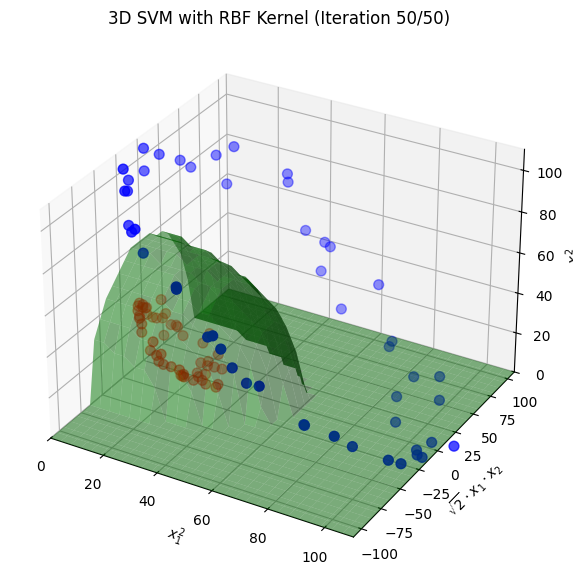

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from IPython.display import clear_output, display

def generate_circles(n_points, radius_inner, radius_outer):
    """
    Generate two concentric circles with specified radii and number of points.
    """
    angles = np.linspace(0, 2 * np.pi, n_points // 2, endpoint=False)
    inner_circle = np.c_[radius_inner * np.cos(angles), radius_inner * np.sin(angles)]
    outer_circle = np.c_[radius_outer * np.cos(angles), radius_outer * np.sin(angles)]
    inner_circle += np.random.normal(0, 0.4, inner_circle.shape)
    outer_circle += np.random.normal(0, 0.4, outer_circle.shape)

    X = np.vstack([inner_circle, outer_circle])
    y = np.array([0] * (n_points // 2) + [1] * (n_points // 2))
    return X, y

def poly_kernel_map(X, t):
    """
    Gradually maps 2D points to 3D space using polynomial kernel mapping.
    phi(x) = [x1^2, sqrt(2)*x1*x2, x2^2]
    t controls the animation step (0 <= t <= 1).
    """
    x1, x2 = X[:, 0], X[:, 1]
    z1 = t * (x1**2)
    z2 = t * (np.sqrt(2) * x1 * x2)
    z3 = t * (x2**2)
    return np.c_[z1, z2, z3]

n_points = 100
X, y = generate_circles(n_points, radius_inner=5, radius_outer=10)

n_iters = 50
scale_factor = 1.0

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for i in range(n_iters + 1):
    clear_output(wait=True)
    ax.clear()

    t = i / n_iters * scale_factor
    X_mapped = poly_kernel_map(X, t)

    if t > 0:
        model = SVC(kernel='rbf', probability=True)
        model.fit(X_mapped, y)

        z1_range = np.linspace(0, 110, 30)
        z2_range = np.linspace(-110, 110, 30)
        Z1, Z2 = np.meshgrid(z1_range, z2_range)
        Z3 = np.zeros_like(Z1)

        for idx, (z1, z2) in enumerate(zip(Z1.ravel(), Z2.ravel())):
            test_points = np.c_[np.full(Z1.shape[1], z1), np.full(Z2.shape[1], z2), np.linspace(0, 110, Z1.shape[1])]
            probs = model.predict_proba(test_points)[:, 1]
            boundary_idx = np.argmax(probs > 0.5)
            Z3.ravel()[idx] = test_points[boundary_idx, 2] if boundary_idx < len(test_points) else 110

        ax.plot_surface(Z1, Z2, Z3, color='green', alpha=0.5, edgecolor='none')

    colors = ['red' if label == 0 else 'blue' for label in y]
    ax.scatter(X_mapped[:, 0], X_mapped[:, 1], X_mapped[:, 2], c=colors, s=50)
    ax.set_xlim([0, 110])
    ax.set_ylim([-110, 110])
    ax.set_zlim([0, 110])
    ax.set_xlabel("$x_1^2$")
    ax.set_ylabel("$\sqrt{2} \cdot x_1 \cdot x_2$")
    ax.set_zlabel("$x_2^2$")
    ax.set_title(f"3D SVM with RBF Kernel (Iteration {i}/{n_iters})")

    display(fig)
    plt.pause(0.1)

plt.close(fig)


- Visualize how gamma and C affect to the model with kernel is polynomial

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from ipywidgets import interact, FloatSlider, IntSlider

n_points = 100
X, y = generate_circles(n_points, radius_inner=5, radius_outer=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def plot_svm_poly(C, gamma):
    model = SVC(kernel='poly',coef0=1, degree=3,C=C, gamma=gamma)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50, edgecolors='k')

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
               s=100, linewidth=1, facecolors='none', edgecolors='k')

    plt.title(f'SVM with RBF Kernel (C={C}, gamma={gamma}), Accuracy={acc:.2f}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
interact(plot_svm_poly,
         C=FloatSlider(value=1.0, min=0.01, max=10.0, step=0.1, description='C'),
         gamma=FloatSlider(value=1.0, min=0.01, max=10.0, step=0.1, description='gamma'));

interactive(children=(FloatSlider(value=1.0, description='C', max=10.0, min=0.01), FloatSlider(value=1.0, desc…

<h1>Use SVM for mnist dataset</h1>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


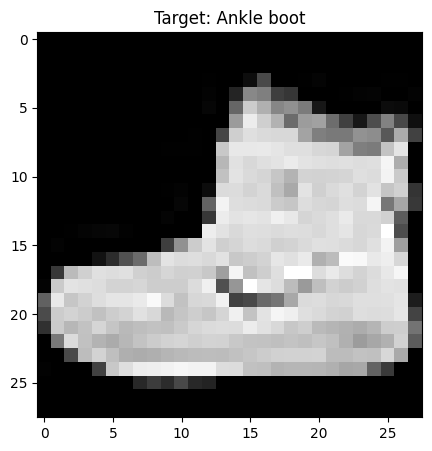

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(5,5))
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Target: {class_names[y_train[0]]}")
plt.show()

In [ ]:
X_train = X_train/255.0
X_test = X_test / 255.0
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)
svm = SVC(kernel='rbf')
svm.fit(X_train_flattened, y_train)


SVC()

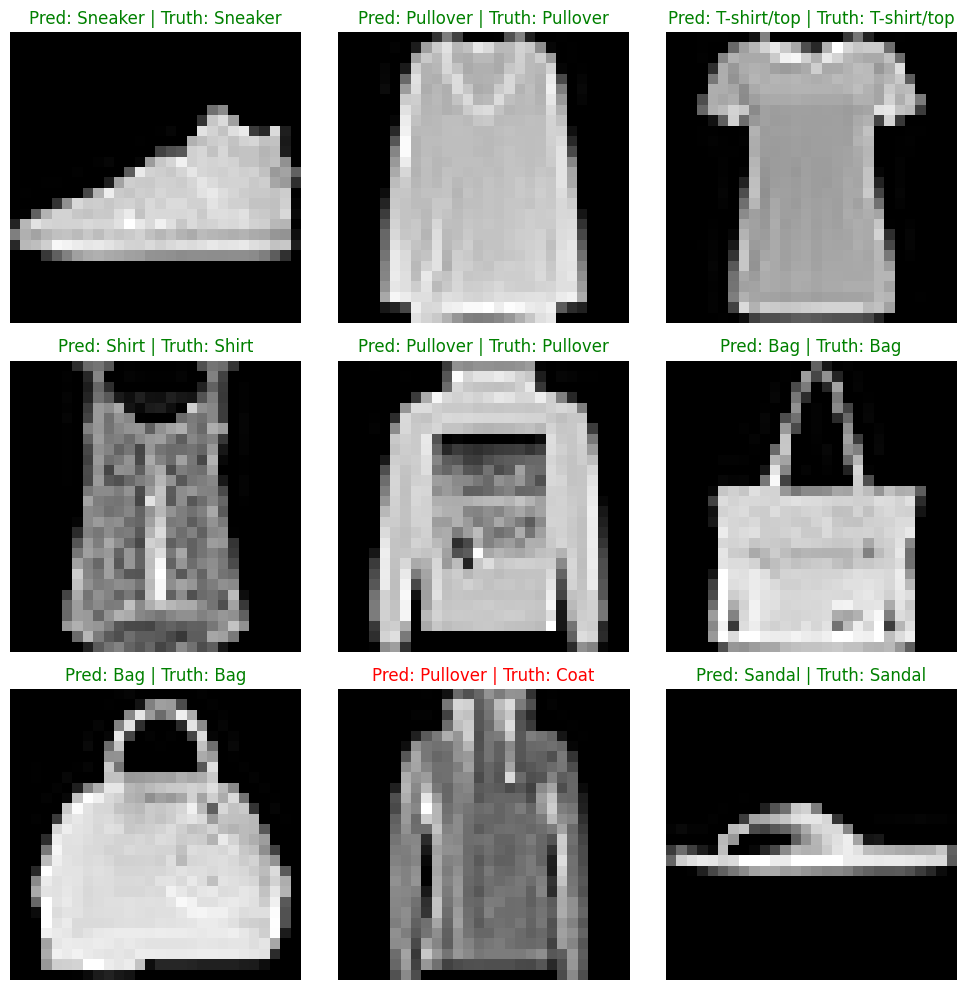

In [ ]:
np.random.seed(23520460)
indices = np.random.choice(len(X_test), size=9, replace=False)
X_sample = X_test_flattened[indices]
y_sample_true = y_test[indices]
y_sample_pred = svm.predict(X_sample)
X_sample_reshaped = X_sample.reshape(-1, 28, 28)
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.ravel()
for i in range(9):
    ax = axes[i]
    ax.imshow(X_sample_reshaped[i], cmap='gray')
    pred_label = y_sample_pred[i]
    true_label = y_sample_true[i]
    color = "green" if pred_label == true_label else "red"
    ax.set_title(f"Pred: {class_names[pred_label]} | Truth: {class_names[true_label]}", color=color)
    ax.axis('off')
plt.tight_layout()
plt.show()


<Figure size 1000x1000 with 0 Axes>

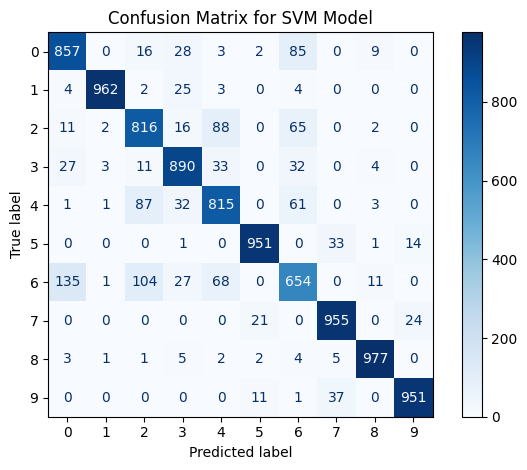

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on the test set
y_pred = svm.predict(X_test_flattened)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(10, 10))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix for SVM Model")
plt.tight_layout()
plt.show()

### Compare SVM versus other machine learning algorithms.

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

models = {
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "MLP": MLPClassifier(max_iter=500),
    "SVM": SVC(kernel='rbf')
}
results = []
for name, model in models.items():
    model.fit(X_train_flattened, y_train)
    y_pred = model.predict(X_test_flattened)
    accuracy = accuracy_score(y_test, y_pred)
    results.append({"Model": name, "Accuracy": accuracy})

results_df = pd.DataFrame(results)

results_df


,Model,Accuracy
0,KNN,0.8554
1,Logistic Regression,0.8435
2,Random Forest,0.8774
3,MLP,0.8821
4,SVM,0.8828
